# Procesamiento en python acerca del Dataframe 3:
# Elenco y popularidad (Elenco.csv y popularidad.csv)

In [136]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import plotly as pl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msmo
from statistics import multimode, mean, median
import math

# Importar datos de los archivos .csv

In [137]:
df_elenco = pd.read_csv("..\\dataset\\elenco.csv", index_col=0)
df_popularidad = pd.read_csv("..\\dataset\\popularidad.csv", index_col=0)

In [138]:
df_elenco.head()

,title,total_actors
film_id,,
508,lambs cincinatti,15
87,boondock ballroom,13
146,chitty lock,13
188,crazy home,13
249,dracula crystal,13


In [139]:
df_popularidad.head()

,full_name,film_participations
actor_id,,
107,gina degeneres,42
102,walter torn,41
198,mary keitel,40
181,matthew carrey,39
23,sandra kilmer,37


In [140]:
df_popularidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 107 to 148
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_name            200 non-null    object
 1   film_participations  200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [141]:
df_elenco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 508 to 995
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         997 non-null    object
 1   total_actors  997 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


# Vemos que no hay valores nulos

In [142]:
df_elenco.isna().sum()

title           0
total_actors    0
dtype: int64

In [143]:
df_popularidad.isna().sum()

full_name              0
film_participations    0
dtype: int64

# Creamos copias de los datasets

In [144]:
df_popularidad_copy = df_popularidad.copy()
df_elenco_copy = df_elenco.copy()

# Detectar outliers

# Columna total_actors del archivo elenco.csv

# Calculamos límites y percentiles

In [145]:
# Cálculo de límites
Q1 = df_elenco_copy['total_actors'].quantile(0.25)
Q3 = df_elenco_copy['total_actors'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Generamos el gráfico

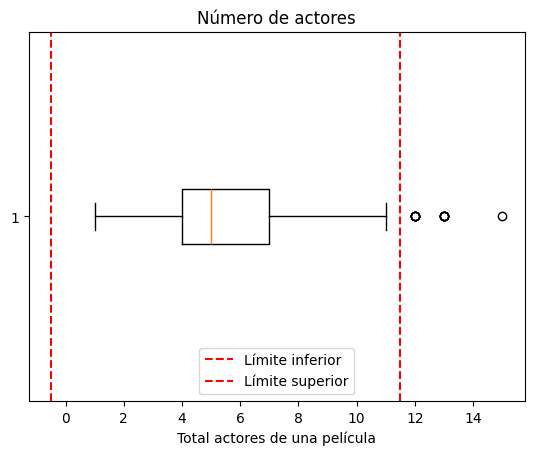

In [146]:
# Boxplot horizontal
plt.boxplot(df_elenco_copy['total_actors'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Total actores de una película")
plt.title("Número de actores")
plt.legend()
plt.show()

##### En la inspección de los datos se identificaron algunos valores atípicos (outliers) que superan el límite superior establecido por los criterios estadísticos habituales. La presencia de estos outliers podría estar asociada a títulos con mayor reconocimiento, producciones con presupuestos superiores o proyectos con directores y guionistas de renombre, factores que suelen atraer mayor interés y participación de actores.

##### A pesar de su magnitud, estos valores extremos no representan un problema significativo para el conjunto del dataset. Su número es reducido y no altera de forma sustancial las tendencias generales ni afecta de manera notable a las medidas de tendencia central (media, mediana). Por lo tanto, se consideran datos válidos y coherentes con la realidad del dominio, y no se justifican acciones como su eliminación o ajuste.

# Columna film_participations del archivo popularidad.csv

# Calculamos límites y percentiles

In [147]:
# Cálculo de límites
Q1 = df_popularidad_copy['film_participations'].quantile(0.25)
Q3 = df_popularidad_copy['film_participations'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

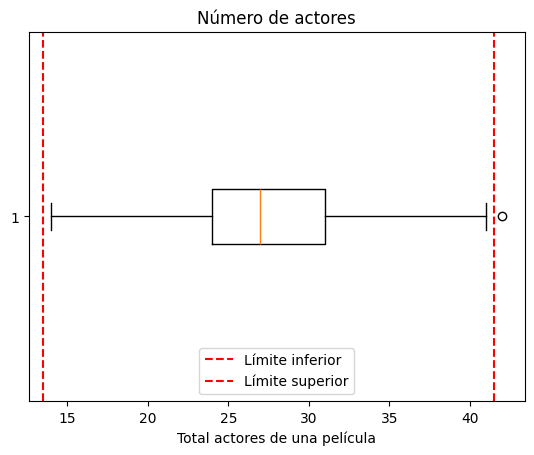

In [148]:
# Boxplot horizontal
plt.boxplot(df_popularidad_copy['film_participations'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Total actores de una película")
plt.title("Número de actores")
plt.legend()
plt.show()

##### Los datos se encuentran mayoritariamente dentro del rango esperado, con la excepción de un único valor que supera ligeramente el límite superior —solo por 1 o 2 unidades respecto al resto— en cuanto al número de películas en las que ha participado. Esta desviación mínima no representa un outlier preocupante ni implica un impacto significativo en la distribución general.

##### Dado que el resto de observaciones se concentran alrededor de la media y presentan una variabilidad reducida, este valor ligeramente elevado no introduce sesgos ni altera de forma relevante las métricas descriptivas. En consecuencia, puede considerarse como una variación natural dentro del comportamiento del conjunto de datos y no requiere acciones correctivas.

# Generación de datos analísticos (media, moda y mediana) y gráficos para ellos

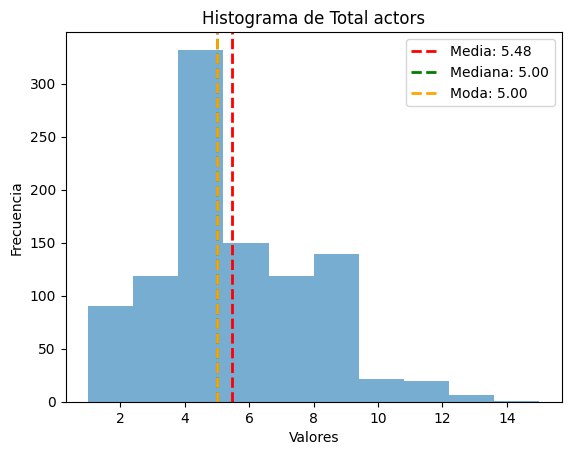

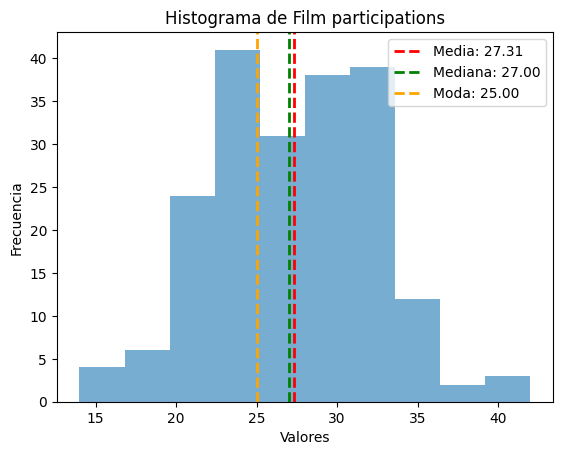

In [149]:
# Lista de columnas del dataframe
datasets = [
    df_elenco_copy['total_actors'], 
    df_popularidad_copy['film_participations'], 
]
nombres = ['Total actors', 'Film participations']

for datos, nombre in zip(datasets, nombres):

    datos = datos.dropna()

    media = datos.mean()
    mediana = datos.median()
    moda = datos.mode().iloc[0]

    plt.hist(datos, bins=10, alpha=0.6)

    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    plt.axvline(moda, color='orange', linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

    plt.title(f"Histograma de {nombre}")
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

# total_actors

##### La gráfica muestra una distribución en la que los datos se concentran principalmente entre los valores 4 y 5, evidenciando un pico claro en ese intervalo. Esta concentración indica que la mayoría de las observaciones se agrupan en torno a ese rango, mientras que el resto de los valores se dispersan ligeramente a ambos lados de la distribución.

##### En lo referente a las medidas de tendencia central, la media se sitúa ligeramente por encima de la mediana y de la moda, lo que sugiere la presencia de algunos valores algo más elevados que empujan la media hacia arriba. Esto podría interpretarse como indicio de que existen casos con un número de contrataciones algo superior —posiblemente asociado a producciones con mayor presupuesto o a actores con más participación—, aunque este comportamiento no necesariamente implica un mayor presupuesto, ya que también intervienen factores como el caché o relevancia de cada actor.

##### Por otro lado, la moda coincide con el valor 5, que es precisamente donde se concentra el mayor volumen de observaciones. Esto es coherente con la forma de la distribución y confirma que dicho valor representa el punto más frecuente en el conjunto de datos.

##### En conjunto, las medidas estadísticas son consistentes con la distribución observada y no apuntan a irregularidades significativas ni a la presencia de valores que distorsionen la interpretación general del conjunto.

# Film_participations

##### La gráfica evidencia una distribución relativamente continua, aunque con una clara concentración de valores en la zona central. Esto indica que la mayoría de los actores presentan un número moderado de participaciones, mientras que las cifras muy bajas o muy altas son menos frecuentes.

##### En cuanto a las medidas de tendencia central, la media y la mediana son muy similares, lo que sugiere una distribución equilibrada sin asimetrías pronunciadas. Ambas se sitúan ligeramente por encima de la moda, lo que refleja la presencia de algunos valores superiores que elevan levemente la media sin distorsionar de forma significativa la distribución.

##### Por su parte, la moda se posiciona justo por debajo del punto medio del gráfico, representando el valor con mayor frecuencia. Este pico confirma que existe un grupo destacado de actores que participa en un número moderado de películas, dando forma al núcleo principal de la distribución.

##### En conjunto, la relación coherente entre media, mediana y moda indica una distribución estable y sin outliers relevantes, lo que facilita la interpretación y sugiere un comportamiento bastante homogéneo dentro del conjunto de actores analizado.

# Creación de columnas derivadas

## Elenco grande

In [150]:
df_elenco_copy['large_cast'] = np.where(df_elenco_copy['total_actors'] > 6, 'Sí', 'No')

In [151]:
df_elenco_copy

,title,total_actors,large_cast
film_id,,,
508,lambs cincinatti,15,Sí
87,boondock ballroom,13,Sí
146,chitty lock,13,Sí
188,crazy home,13,Sí
249,dracula crystal,13,Sí
...,...,...,...
681,pirates roxanne,1,No
701,psycho shrunk,1,No
789,shock cabin,1,No


# Gráfico de películas porcentaje de peliculas con elenco grande

<function matplotlib.pyplot.show(close=None, block=None)>

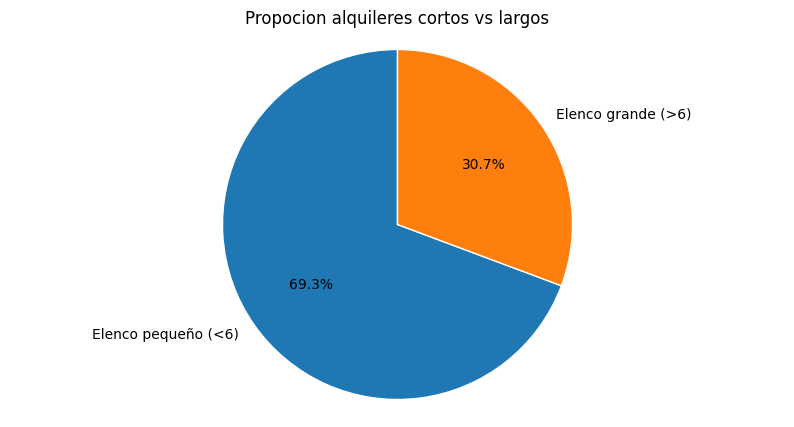

In [152]:
values = df_elenco_copy['large_cast'].value_counts()
labels = ['Elenco pequeño (<6)', 'Elenco grande (>6)']

plt.figure(figsize=(10, 5))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Propocion alquileres cortos vs largos")
plt.axis('equal')
plt.show

##### Vemos que más de 2/3 de las películas son de elenco corto, esto se corresponde con lo visto en la moda anteriormente vista ya que este valor se situa en 5 personas. Esto indica que la mayoria de peliculas o bien tienen elenco bajo por el bajo presupuesto o bien porque los actores escogidos tienen una mayor caché y el pago es mayor.

# Gráfico de actores. Porcentaje de actores con muchas peliculas

In [153]:
df_popularidad_copy['popular_actor'] = np.where(df_popularidad_copy['film_participations'] > 32, 'Sí', 'No')

In [154]:
df_popularidad_copy

,full_name,film_participations,popular_actor
actor_id,,,
107,gina degeneres,42,Sí
102,walter torn,41,Sí
198,mary keitel,40,Sí
181,matthew carrey,39,Sí
23,sandra kilmer,37,Sí
...,...,...,...
31,sissy sobieski,18,No
186,julia zellweger,16,No
35,judy dean,15,No


<function matplotlib.pyplot.show(close=None, block=None)>

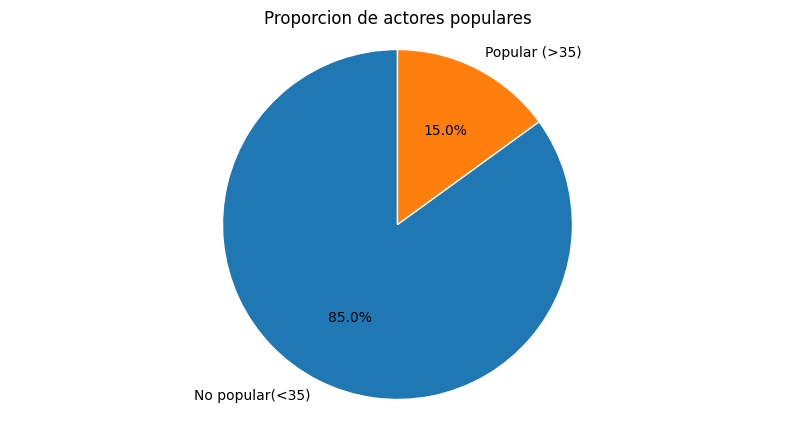

In [155]:
values = df_popularidad_copy['popular_actor'].value_counts()
labels = ['No popular(<35)', 'Popular (>35)']

plt.figure(figsize=(10, 5))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Proporcion de actores populares")
plt.axis('equal')
plt.show

##### Como era de esperar, la mayoría de los actores no alcanza un nivel de participación muy alto, lo que indica que la mayor parte se mantiene en rangos de reconocimiento limitado. Sin embargo, al observar el límite superior de 35 películas, se evidencia un grupo reducido de actores con una participación significativamente mayor. Estos actores, al acumular tantas apariciones, empiezan a consolidar mayor renombre y visibilidad dentro de la industria, destacándose sobre el resto del conjunto.

##### Esta distribución refleja una concentración natural: muchos actores tienen pocas participaciones, mientras que un pequeño número alcanza niveles elevados que potencian su popularidad y reputación profesional.

# Exportación del dataset

In [156]:
df_elenco_copy.to_csv("..\\elenco_clean.csv", index=False)
df_popularidad_copy.to_csv("..\\popularidad_clean.csv", index=False)